<font size='4'><b>Problem statement:</b> Perform Exploratory Data Analysis (EDA) on Weather dataset. Extract hidden patterns, trends and ralationships. Formulate necessary questions to ask to the dataset.</font>

<br/><br/>

In [4]:
# Importing libraries.
import wget
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

In [6]:
file_name  = "Weather.csv"
zenodo_url = "https://zenodo.org/record/4095483/files/"

In [7]:
# Downloading the file Weather.csv from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/Weather.csv'

In [8]:
# Loading the downloaded file into dataframe.
df = pd.read_csv("./Assets/Weather.csv")

In [9]:
# A bird's eye view on the dataframe.
df.head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


#### For easy exploration  renaming the columns.

In [5]:
df.rename(columns = {'Date/Time':'DateTime','Temp_C':'Temp','Dew Point Temp_C':'DewPoint','Rel Hum_%':'RelHum','Wind Speed_km/h':'WindSpeed','Visibility_km':'Visibility','Press_kPa' :'Pressure','Weather':'Weather'}, inplace= True)

In [6]:
df.head(3)

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


## Data Exploration 

#### Displaying first N(3) rows of the dataframe.

In [7]:
df.head(3)

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


#### Displaying number of rows and columns of the dataframe. 

In [8]:
df.shape

(8784, 8)

#### Displaying the name of each columns.

In [9]:
df.columns

Index(['DateTime', 'Temp', 'DewPoint', 'RelHum', 'WindSpeed', 'Visibility',
       'Pressure', 'Weather'],
      dtype='object')

#### Displaying the range of index of each column.

#### Note: It displays one index extra by default.

In [1]:
df.index

NameError: name 'df' is not defined

#### Displaying the datatypes of each column.

In [11]:
df.dtypes

DateTime       object
Temp          float64
DewPoint      float64
RelHum          int64
WindSpeed       int64
Visibility    float64
Pressure      float64
Weather        object
dtype: object

#### Displaying the unique values in a column(not on whole dataframe). It is specialy useful for categorical data.

In [12]:
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

#### Displaying the number of unique values in a column or whole dataframe. 

In [13]:
df.nunique()

DateTime      8784
Temp           533
DewPoint       489
RelHum          83
WindSpeed       34
Visibility      24
Pressure       518
Weather         50
dtype: int64

#### Displaying basic information about the data.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DateTime    8784 non-null   object 
 1   Temp        8784 non-null   float64
 2   DewPoint    8784 non-null   float64
 3   RelHum      8784 non-null   int64  
 4   WindSpeed   8784 non-null   int64  
 5   Visibility  8784 non-null   float64
 6   Pressure    8784 non-null   float64
 7   Weather     8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


#### Displaying total number of non-null values in a dataframe or a column.

In [15]:
df.count()

DateTime      8784
Temp          8784
DewPoint      8784
RelHum        8784
WindSpeed     8784
Visibility    8784
Pressure      8784
Weather       8784
dtype: int64

#### Displaying total number of unique values in a column and their number of occurances. It is especialy used for categorical data.

In [16]:
df['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

#### Missing value detection

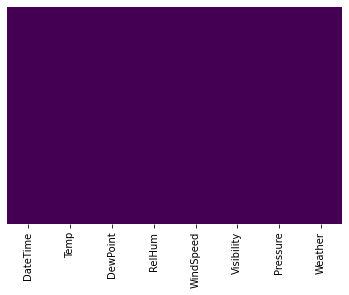

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### No missing values!!

#### Checking the distribution of the target class.

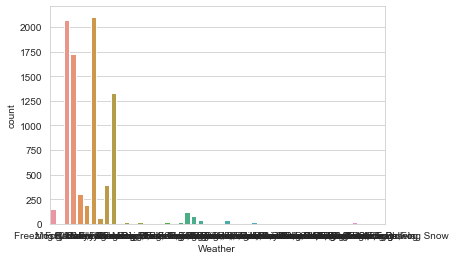

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Weather',data=df)

## Data analysis

#### Note: The below demonstrated technique's (Univariate analysis, Bivariate analysis and Multivariate analysis) importance is more pronounced when there are small number of target classes. I have considered top 4 classes for the experiment purpose.

### 1. Univariate analysis

In [30]:
df_mainlyClear=df[df['Weather']=='Mainly Clear']
df_mostlyCloudy=df[df['Weather']=='Mostly Cloudy']
df_cloudy=df[df['Weather']=='Cloudy']
df_clear=df[df['Weather']=='Clear']

Text(0.5, 1.0, 'Univariate: Weather Vs Wind speed')

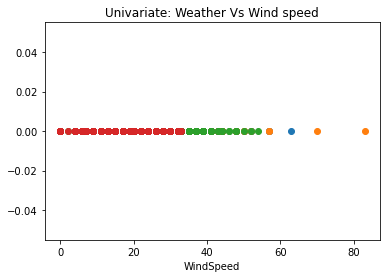

In [19]:
# Analysis with repect to WindSpeed
plt.plot(df_mainlyClear['WindSpeed'],np.zeros_like(df_mainlyClear['WindSpeed']),'o')
plt.plot(df_mostlyCloudy['WindSpeed'],np.zeros_like(df_mostlyCloudy['WindSpeed']),'o')
plt.plot(df_cloudy['WindSpeed'],np.zeros_like(df_cloudy['WindSpeed']),'o')
plt.plot(df_clear['WindSpeed'],np.zeros_like(df_clear['WindSpeed']),'o')
plt.xlabel('WindSpeed')
plt.title('Univariate: Weather Vs Wind speed')

### 2. Bivariate analysis.

In [27]:
df.reset_index()

,index,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather
0,0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [33]:
df4=pd.concat([df_mainlyClear,df_mostlyCloudy,df_cloudy,df_clear],axis=0)

In [34]:
df4.head(3)

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather
36,1/2/2012 12:00,1.7,-6.2,56,48,24.1,99.21,Mainly Clear
60,1/3/2012 12:00,-14.9,-22.6,52,20,24.1,101.34,Mainly Clear
61,1/3/2012 13:00,-15.1,-22.4,54,22,24.1,101.34,Mainly Clear


Text(0.5, 1.0, 'Bivariate analysis: Visibility Vs Relative Humidity')

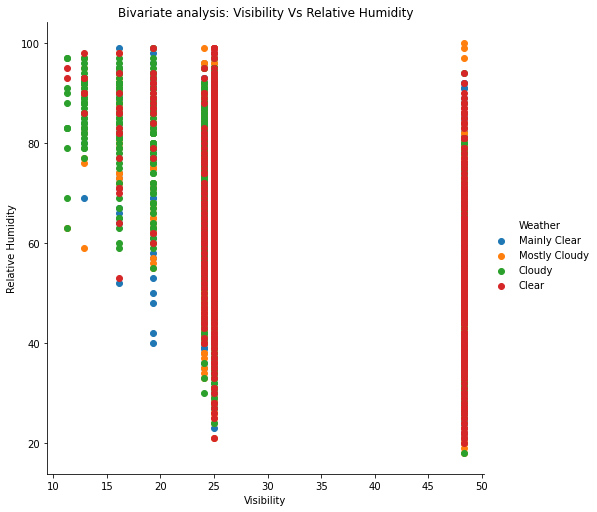

In [36]:
sns.FacetGrid(df4, hue='Weather', size=7).map(plt.scatter,'Visibility', 'RelHum').add_legend()
plt.xlabel('Visibility')
plt.ylabel('Relative Humidity')
plt.title('Bivariate analysis: Visibility Vs Relative Humidity',loc='center')

### 3. Multivariate analysis

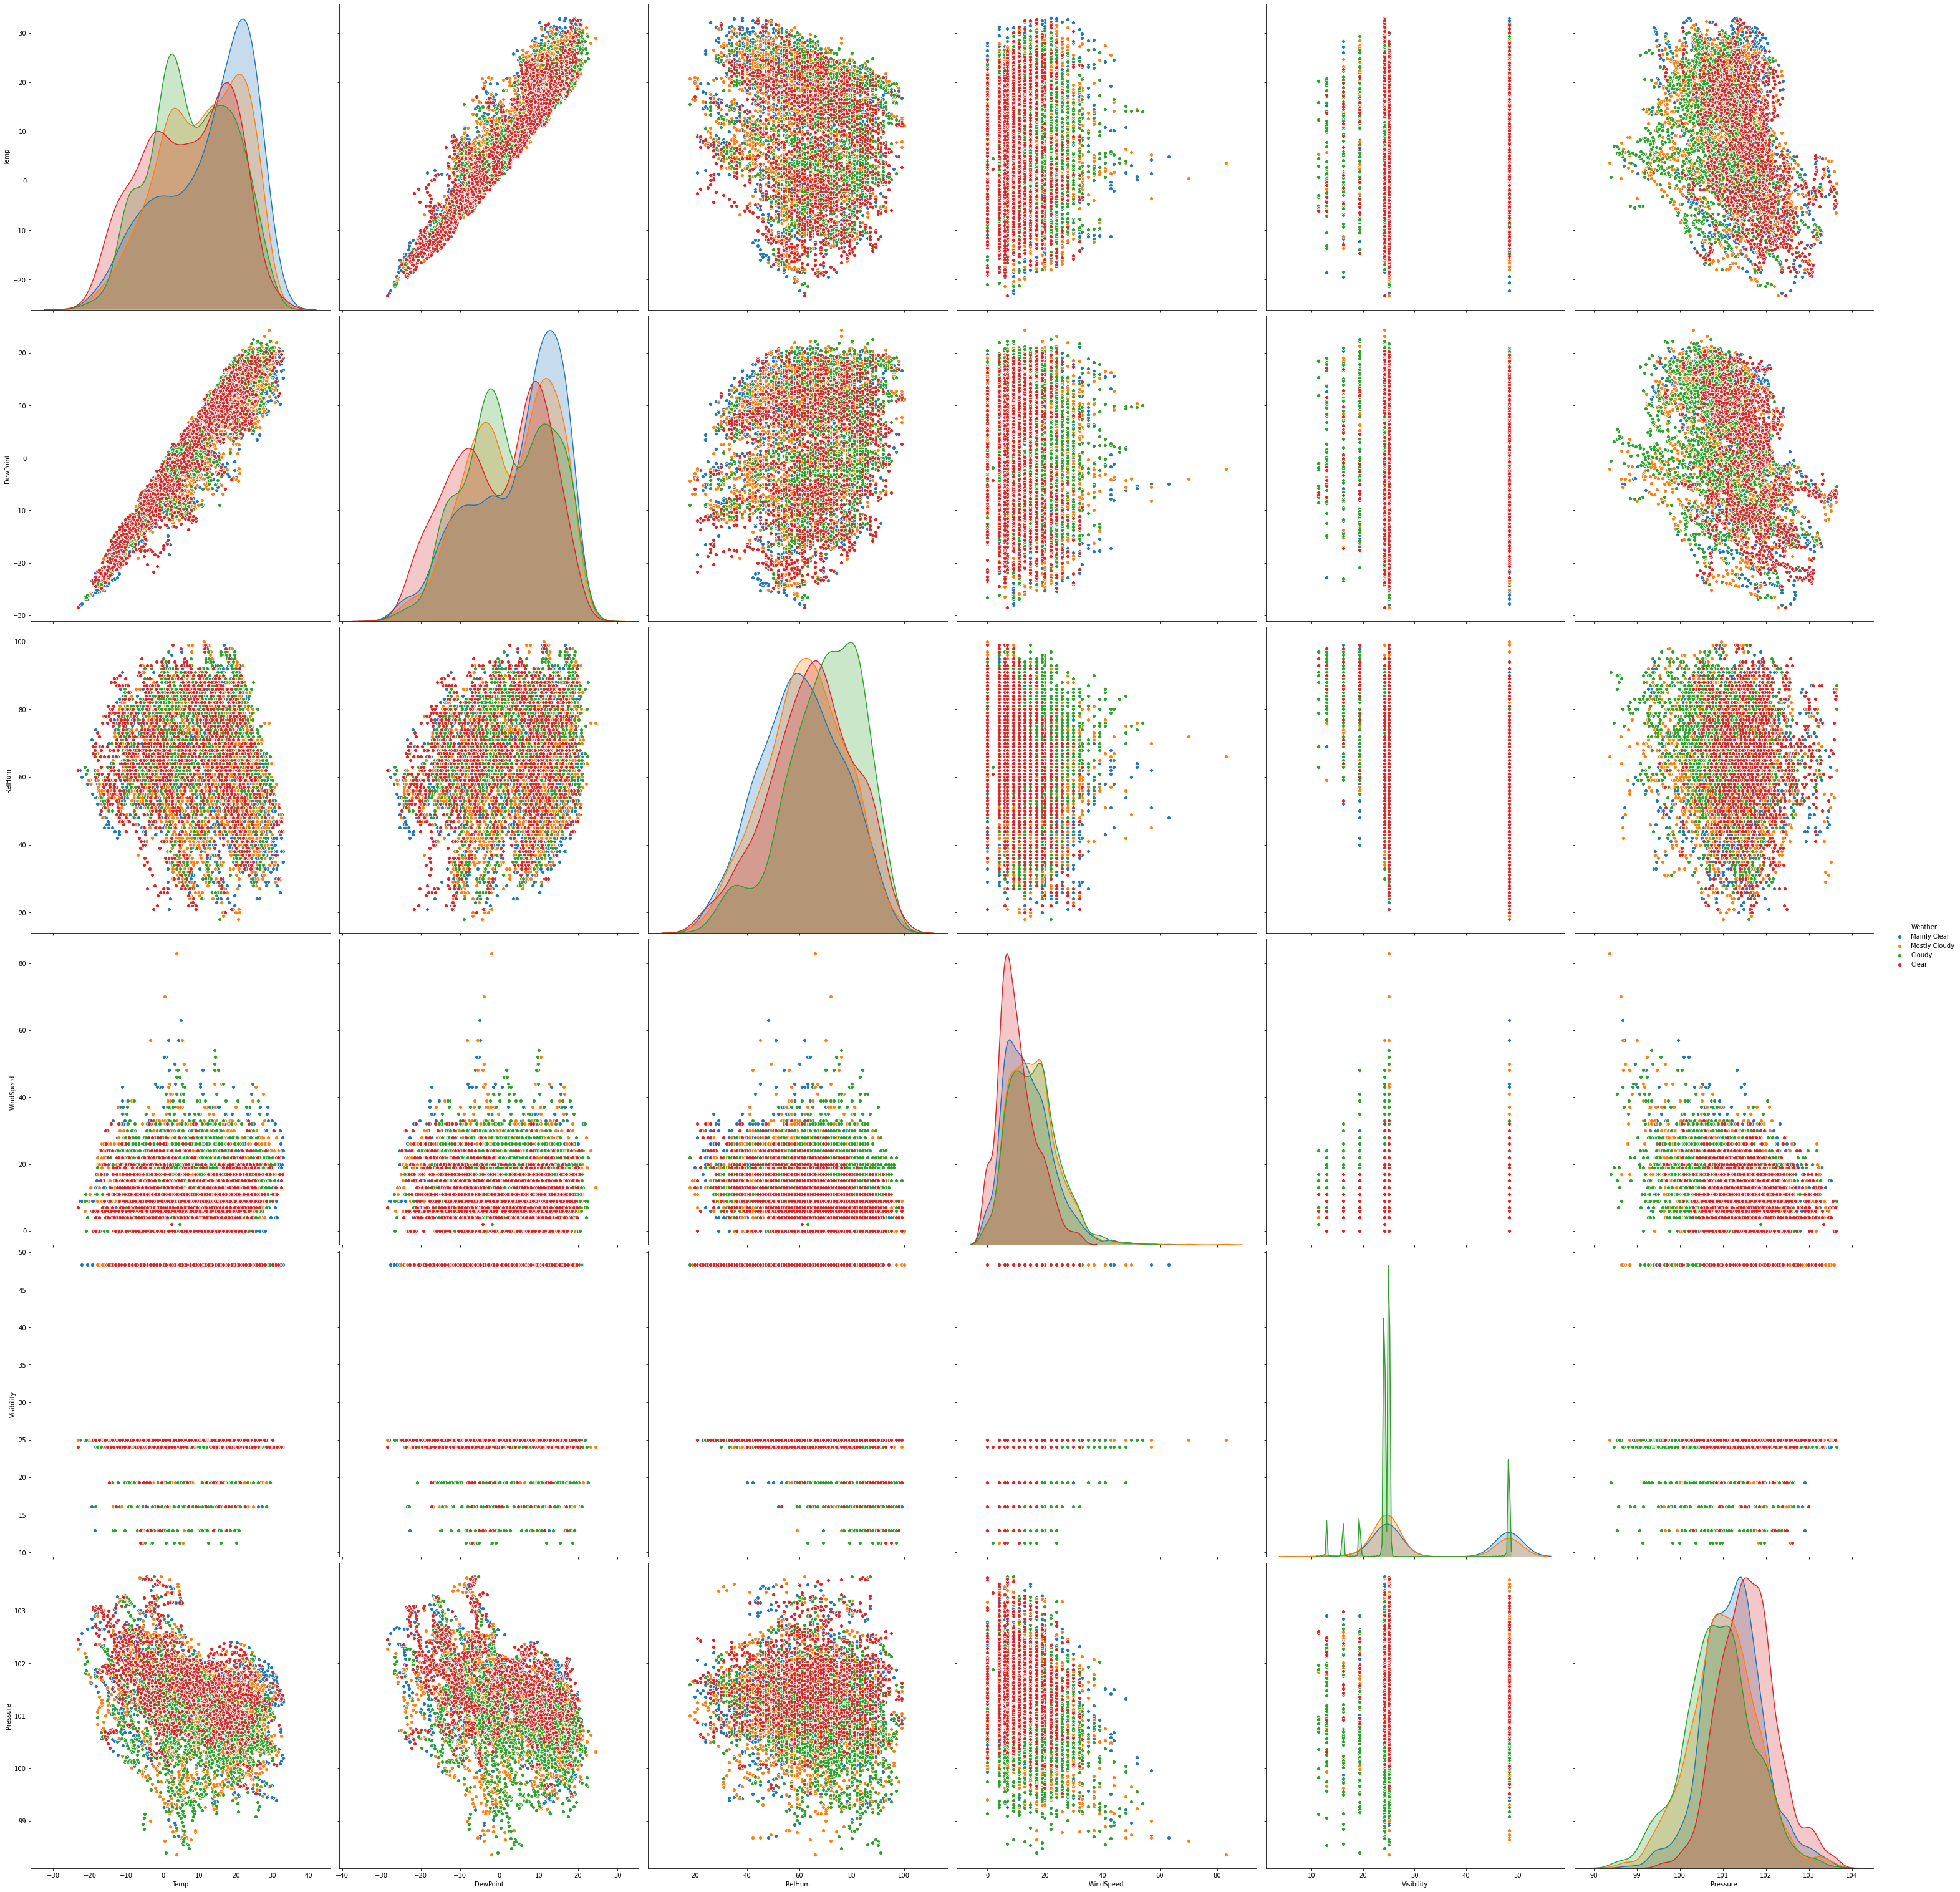

In [37]:
sns.pairplot(df4, hue='Weather', size=7)

#### Analysing the distribution of the target class.

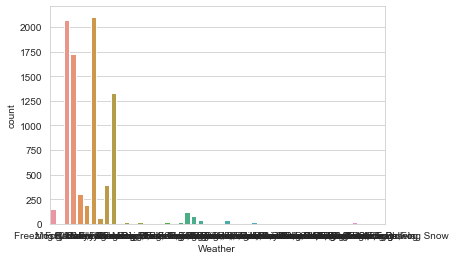

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Weather',data=df)

#### Since the data are clumped up, let us visualize the top 4 classes. Nevertheless, it is clearly an imbalanced dataset .

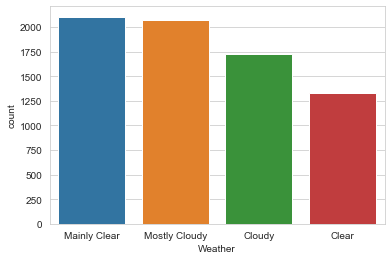

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Weather',data=df4)

## Data analysis Q and A.

#### Finding all the instances when the weather was 'fog' and visibility was 'above 40'. It is obvious that is an oxymoron, but handy for checking the reliability of the data.

In [56]:
df[(df.Weather=='fog')&(df.Visibility>40)]

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather


#### Finding the number of time when the weather is exactly clear.

In [38]:
#By using exploration method
df['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [39]:
#By using filters
len(df[df['Weather']=='Clear'])

1326

In [43]:
#By using groupby
df.groupby('Weather').get_group('Clear').head(3)

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear


#### Finding the number of when the wind Speed was exactly 4km/h.

In [44]:
len(df[df['WindSpeed']==4])

474

#### Finding the null values in the data.

In [45]:
df.isnull().sum()

DateTime      0
Temp          0
DewPoint      0
RelHum        0
WindSpeed     0
Visibility    0
Pressure      0
Weather       0
dtype: int64

#### Finding the mean visiblity when the weather was cloudy.

In [47]:
df[df['Weather']=='Cloudy']['Visibility'].mean()

26.62575231481446

#### Finding the minimum and maximum value of each column against each weather condition.

In [57]:
df.groupby('Weather').min()

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure
Weather,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44


#### Finding all the instances where 1. weather was clear or relative humidity was greater than 50 and 2. Visibility was more than 40.

In [60]:
df[(df['Weather']=='Clear') & (df['RelHum']>50)| (df['Visibility']>40)]

,DateTime,Temp,DewPoint,RelHum,WindSpeed,Visibility,Pressure,Weather
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


<br/><br/>

<font size='4'><b>Way forward:</b> Exploratory Data Analysis provides utmost value to any business by helping Data scientists understand if the results they’ve produced are correctly interpreted and if they are pertinent to the required business contexts. The above understandings go a long way in assisting advanced model building. Further, EDA also encompasses clustering techniques which are demonstrated separately in the Clustering repository.</font> 